In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
import math

In [ ]:
num_samples=800
image_size = (100, 100)
dataset='datasetfortwotwod'
labels_path = os.path.join(dataset, 'labels.csv')
labels_df = pd.read_csv(labels_path)

def load_and_preprocess_image(image_path,target_size=(100,100)):
    img = load_img(image_path,target_size=target_size, color_mode='rgb')
    img_array = img_to_array(img) / 100.0  # Normalize pixel values
    return img_array


images = []
points=[]
for index, row in labels_df.iterrows():
    image_name = row['image_Name']
    p1x = row['Point1_X']
    p1y = row['Point1_Y']
    p2x = row['Point2_X']
    p2y = row['Point2_Y']
    image_path = os.path.join(dataset, image_name)
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
    datagen = ImageDataGenerator(
              rotation_range=40,  # Randomly rotate images by up to 40 degrees
              width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
              height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
              shear_range=0.2,  # Randomly apply shearing transformation
              zoom_range=0.2,  # Randomly zoom in or out
              horizontal_flip=True  # Randomly flip images horizontally
)

# Apply data augmentation to your training images
    train_datagen = datagen.flow_from_directory(
              "datasetfortwo",  # Replace with your directory path
                target_size=(100, 100),  # Resize images to a specific size
             batch_size=32,
              class_mode="categorical"  # Adjust class_mode based on your task
            )
    image = load_and_preprocess_image(image_path)
    images.append(image)
    points.append([p1x,p1y,p2x,p2y])

points=np.array(points)/100
images=np.array(images)
images

In [ ]:
train_images, test_images, train_points, test_points = train_test_split(images, points, test_size=0.1, random_state=452)


In [ ]:
model = Sequential([
    Conv2D(filters=64,kernel_size= (3, 3), activation='relu', padding='same',input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.1),
    Conv2D(128, (2, 2),  padding='same',activation='relu'),
    MaxPooling2D((1, 1)),
    Dropout(0.1),
    Conv2D(128, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((1, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4)
])

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                 patience=10,
                                 restore_best_weights=True)
reduce_learning=tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                     factor=0.2,
                                     verbose=0,
                                     patience=5,
                                     min_lr=0.000001,
)
callback = tf.keras.callbacks.ModelCheckpoint(
    'HI.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
    )
model.compile(optimizer='adam',metrics=['accuracy'],loss='mean_absolute_error')
model.fit(train_images,train_points,epochs=50,validation_split=0.2,callbacks=[early_stopping, reduce_learning, callback])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


point 1 : [86, 50] point 2 : [79, 74]
distance between them : 25.0


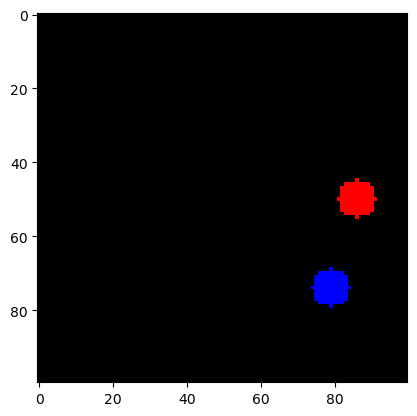

In [ ]:
x=18
plt.imshow(test_images[x])
tes=np.squeeze(test_points[x])
p1=[round(tes[0]*100),round(tes[1]*100)]
p2=[round(tes[2]*100),round(tes[3]*100)]
print(f"point 1 : {p1} point 2 : {p2}")
print("distance between them :",math.dist(p1,p2))

In [ ]:
result=np.array(model.predict(np.expand_dims(test_images[x], axis=0)))
res=np.squeeze(result)
point1=[round(res[0]*100),round(res[1]*100)]
point2=[round(res[2]*100),round(res[3]*100)]
print(f"point1 : {point1} , point2 : {point2}")
print("distance between them :",math.dist(point1,point2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
point1 : [82, 51] , point2 : [77, 74]
distance between them : 23.53720459187964


In [ ]:
diffdata='dataforlollololoa'
coordinates_path=os.path.join(diffdata , 'coordinates.csv')
coordinates_read=pd.read_csv(coordinates_path)

def load_and_preprocess_image(image_path,target_size=(100,100)):
    img = load_img(image_path,target_size=target_size, color_mode='rgb')
    img_array = img_to_array(img) / 100.0  # Normalize pixel values
    return img_array

dimages = []
dpoints=[]
for index, row in coordinates_read.iterrows():
    dimage_name = row['image_name']
    dp1x = row['x1']
    dp1y = row['y1']
    dp2x = row['x2']
    dp2y = row['y2']
    dimage_path = os.path.join(diffdata, dimage_name)
    dimage = load_and_preprocess_image(dimage_path)
    dimages.append(dimage)
    dpoints.append([dp1x,dp1y,dp2x,dp2y])

dpoints=np.array(dpoints)/100
dimages=np.array(dimages)

In [ ]:
#y only even numbers
y=0

In [ ]:
def cal(y,dpoints):
 dres=np.squeeze(dpoints[y])
 point1=[round(dres[0]*100),round(dres[1]*100)]
 point2=[round(dres[2]*100),round(dres[3]*100)]
 print(f"point1 : {point1} , point2 : {point2}")
 dist=math.dist(point1,point2)
 return dist

In [ ]:
dist1=cal(y,dpoints)
print("distance between points of image 1 :",dist1)#calculating the distance between the points using the above function

point1 : [25, 20] , point2 : [70, 69]
distance between points of image 1 : 66.52818951391959


In [ ]:
dist2=cal(y+1,dpoints)
print("distance between points of image 1 :",dist2)

point1 : [20, 19] , point2 : [75, 70]
distance between points of image 1 : 75.0066663703967


In [ ]:
print("difference in distance is", abs(dist1-dist2))

difference in distance is 8.478476856477116


In [ ]:
#calculating thepredicted distance b/w the points in the first image
dresult=model.predict(np.expand_dims(dimages[y], axis=0))
res=np.squeeze(dresult)
point1=[round(res[0]*100),round(res[1]*100)]
point2=[round(res[2]*100),round(res[3]*100)]
print("PREDICTED POINTS")
print(f"point1 : {point1} , point2 : {point2}")
dist1=math.dist(point1,point2)
print("predicted distance between points of image 1:",dist1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
PREDICTED POINTS
point1 : [30, 22] , point2 : [70, 67]
predicted distance between points of image 1: 60.207972893961475


In [ ]:
#calculating the predicted distance b/w the points in the second image
result=model.predict(np.expand_dims(dimages[y+1], axis=0))
res=np.squeeze(result)
point1=[round(res[0]*100),round(res[1]*100)]
point2=[round(res[2]*100),round(res[3]*100)]
print("PREDICTED POINTS")
print(f"point1 : {point1} , point2 : {point2}")
dist2=math.dist(point1,point2)
print("predicted distance between points if image 2:",dist2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
PREDICTED POINTS
point1 : [26, 21] , point2 : [74, 65]
predicted distance between points if image 2: 65.11528238439882


In [ ]:
print("predicted difference in distance is", abs(dist1-dist2))

predicted difference in distance is 4.907309490437349


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


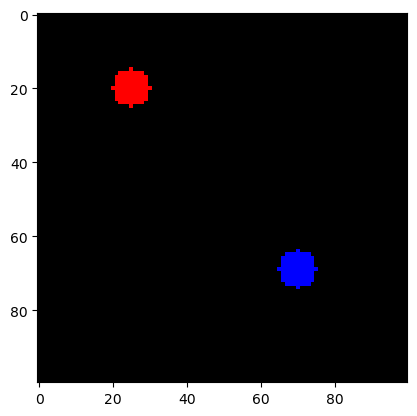

In [ ]:
plt.imshow(dimages[y])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


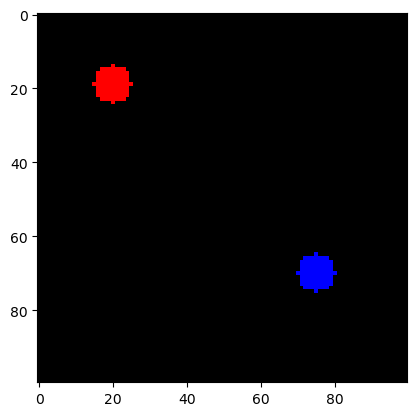

In [ ]:
plt.imshow(dimages[y+1])